# Suppot Vector Machine (SVM) - Machine Learning Classification Model

In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/ilmasheriff/tweetdata",encoding= 'unicode_escape').head(10000)

In [3]:
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a > 0:
        return "1"
    else:
        return "0"

In [4]:
df['Score'] = df['Polarity'].apply(getTextAnalysis)

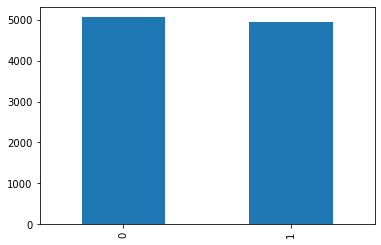

In [5]:
df.Score.value_counts().plot(kind='bar')
plt.show()

In [6]:
t_data_pos= df[df['Score'] == '1']

In [7]:
t_data_neg = df[df['Score'] == '0']

In [8]:
t_data_pos.Data.head(10)

10    RT iansindia Russian President VladimirPutin s...
11    RT SurgoFoundation Indepth story on the need f...
12    RT ndtv BJP Manifesto For Madhya Pradesh Bypol...
13    RT SurgoFoundation States amp cities need to b...
14    RT SurgoFoundation Indepth story on the need f...
15    Indepth story on the need for govts to plan ah...
16    COVID19vaccine modernatx says preparing for la...
19    Pharma major Dr Reddys on Thursday said it has...
21    RahulGandhi VarshaEGaikwad CMOMaharashtra Ajit...
22    RahulGandhi VarshaEGaikwad CMOMaharashtra Ajit...
Name: Data, dtype: object

In [9]:
t_data_neg.Data.head(10)

0    cnsnews benshapiro Can COVID19Vaccine end the ...
1    IntrepidWarrior realDonaldTrump Can COVID19Vac...
2    edyong209 HelenBranswell Can COVID19Vaccine en...
3     AdamTexDavis Can COVID19Vaccine end the pandemic
4          HegKong Can COVID19Vaccine end the pandemic
5    DrTessaT HegKong Can COVID19Vaccine end the pa...
6     FarahKhanAli Can COVID19Vaccine end the pandemic
7    putaYINGonit CMSGov Can COVID19Vaccine end the...
8    C19Vaccine kaimrcksa CEPIvaccines KSAMedResear...
9    Moderna Prepares to Launch COVID19 Vaccine Can...
Name: Data, dtype: object

In [10]:
df.head()

,Unnamed: 0,Data,Subjectivity,Polarity,Score
0,0,cnsnews benshapiro Can COVID19Vaccine end the ...,0.0,0.0,0
1,1,IntrepidWarrior realDonaldTrump Can COVID19Vac...,0.0,0.0,0
2,2,edyong209 HelenBranswell Can COVID19Vaccine en...,0.0,0.0,0
3,3,AdamTexDavis Can COVID19Vaccine end the pandemic,0.0,0.0,0
4,4,HegKong Can COVID19Vaccine end the pandemic,0.0,0.0,0


In [11]:
features = df.iloc[:, 1].values
target = df.iloc[:, 4].values

In [12]:
v_features = []

for text in range(0, len(features)):
    v_feature = re.sub(r'\W', ' ', str(features[text]))
    v_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', v_feature)
    v_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', v_feature) 
    v_feature = re.sub(r'\s+', ' ', v_feature, flags=re.I)
    v_feature = re.sub(r'^b\s+', '', v_feature)
    v_feature = v_feature.lower()
    v_features.append(v_feature)


In [13]:
v_features

['cnsnews benshapiro can covid19vaccine end the pandemic',
 'intrepidwarrior realdonaldtrump can covid19vaccine end the pandemic',
 'edyong209 helenbranswell can covid19vaccine end the pandemic',
 'adamtexdavis can covid19vaccine end the pandemic',
 'hegkong can covid19vaccine end the pandemic',
 'drtessat hegkong can covid19vaccine end the pandemic',
 'farahkhanali can covid19vaccine end the pandemic',
 'putayingonit cmsgov can covid19vaccine end the pandemic',
 'c19vaccine kaimrcksa cepivaccines ksamedresearch mriglobalnews kelloggox zoomus alaskar98 deeptechvc',
 'moderna prepares to launch covid19 vaccine candidatebiopharmaceutical coronavirus coronavirustreatment',
 'rt iansindia russian president vladimirputin said on thursday that russia is ready to produce covid19 vaccines at the sites of foreig',
 'rt surgofoundation indepth story on the need for govts to plan ahead for distribution once covid19vaccine is available we cant rep',
 'rt ndtv bjp manifesto for madhya pradesh bypol

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(v_features)
test_vectors = vectorizer.transform(v_features)

In [15]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, target)
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_to_train = t1-t0
time_to_predict = t2-t1# results
print("Time to train: %fs; Time for Prediction: %fs" % (time_to_train, time_to_predict))

Time to train: 18.592895s; Time for Prediction: 15.688550s


In [16]:
report = classification_report(target, prediction_linear, output_dict=True)
print('positive: ', report['1'])
print('negative: ', report['0'])

positive:  {'precision': 1.0, 'recall': 0.9987868985038415, 'f1-score': 0.999393081124823, 'support': 4946}
negative:  {'precision': 0.9988142292490119, 'recall': 1.0, 'f1-score': 0.9994067629029069, 'support': 5054}


In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(target, prediction_linear))
print(classification_report(target, prediction_linear))
print(accuracy_score(target, prediction_linear))

[[5054    0]
 [   6 4940]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5054
           1       1.00      1.00      1.00      4946

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

0.9994
